The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [125]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [126]:
nobel = pd.read_csv('data/nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [127]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [128]:
nobel['sex'].value_counts()

Male      905
Female     65
Name: sex, dtype: int64

In [129]:
nobel['birth_country'].value_counts().head(10)

United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Japan                        28
Canada                       21
Switzerland                  19
Netherlands                  19
Italy                        18
Name: birth_country, dtype: int64

In [130]:
top_gender = 'Male'
top_country = 'United States of America'

In [131]:
test = np.floor(nobel['year']/10)*10
test

0      1900.0
1      1900.0
2      1900.0
3      1900.0
4      1900.0
        ...  
995    2020.0
996    2020.0
997    2020.0
998    2020.0
999    2020.0
Name: year, Length: 1000, dtype: float64

In [132]:
nobel['usa_born'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year']/10) * 10).astype(int)

nobel.groupby('decade')['usa_born'].agg('mean')

decade
1900    0.017544
1910    0.075000
1920    0.074074
1930    0.250000
1940    0.302326
1950    0.291667
1960    0.265823
1970    0.317308
1980    0.319588
1990    0.403846
2000    0.422764
2010    0.314050
2020    0.360000
Name: usa_born, dtype: float64

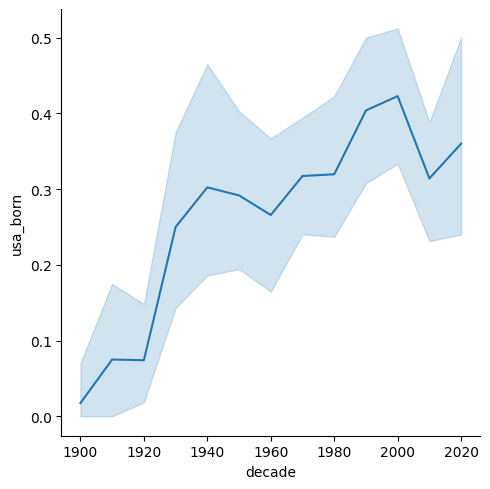

In [133]:
sns.relplot(data=nobel, x='decade', y='usa_born', kind='line')

In [134]:
max_decade_usa = 2000

In [135]:
nobel['female_winner'] = nobel['sex'] == 'Female'
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


In [136]:
female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
female_winners

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


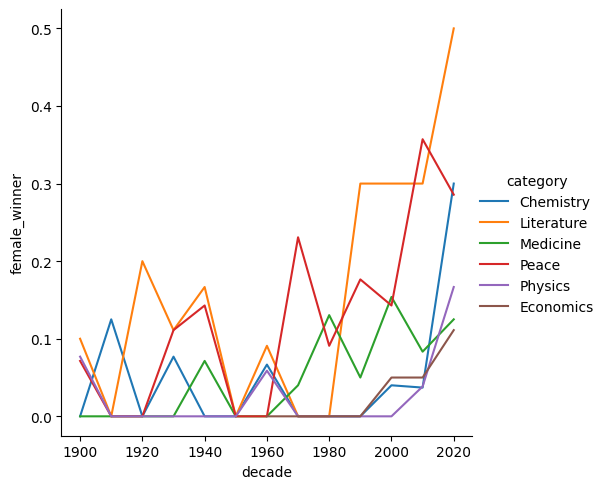

In [137]:
sns.relplot(data=female_winners, x='decade', y='female_winner', hue='category', kind='line')

In [138]:
max_female_dict = {
    2020: 'Literature'
}

In [139]:
female_winners_filter = nobel[['female_winner', 'full_name', 'category', 'year']]
female_winners_filter = female_winners_filter[female_winners_filter['female_winner'] == True]
female_winners_filter.sort_values('year', ascending=True, inplace=True)
female_winners_filter

,female_winner,full_name,category,year
19,True,"Marie Curie, née Sklodowska",Physics,1903
29,True,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,1905
51,True,Selma Ottilia Lovisa Lagerlöf,Literature,1909
62,True,"Marie Curie, née Sklodowska",Chemistry,1911
128,True,Grazia Deledda,Literature,1926
...,...,...,...,...
982,True,Annie Ernaux,Literature,2022
993,True,Anne L’Huillier,Physics,2023
998,True,Narges Mohammadi,Peace,2023
989,True,Katalin Karikó,Medicine,2023


In [140]:
first_woman_name = "Marie Curie, née Sklodowska"
first_woman_category = "Physics"

In [141]:
nobel['full_name'].value_counts()

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: full_name, Length: 993, dtype: int64

In [142]:
repeat = nobel.groupby('full_name').agg(count = ('full_name', 'count'))
repeat.sort_values('count', ascending=False, inplace=True)
repeat

,count
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Office of the United Nations High Commissioner for Refugees (UNHCR),2
Frederick Sanger,2
Linus Carl Pauling,2
John Bardeen,2
...,...
Gertrude B. Elion,1
"Gerty Theresa Cori, née Radnitz",1
Giorgio Parisi,1


In [143]:
repeat_list = [name for name, count in repeat['count'].items() if count >= 2]
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Frederick Sanger',
 'Linus Carl Pauling',
 'John Bardeen',
 'Marie Curie, née Sklodowska']